In [1]:
import platform
import PIL  # Pillow 包通常在 Python 中以 PIL 名称导入
import jupyterlab
import matplotlib
import ipympl
import numpy as np
import pandas as pd

# 打印 Python 版本
print("Python version:", platform.python_version())

# 打印 Pillow 版本
print("Pillow version:", PIL.__version__)

# 打印 JupyterLab 版本
print("JupyterLab version:", jupyterlab.__version__)

# 打印 matplotlib 版本
print("matplotlib version:", matplotlib.__version__)

# 打印 ipympl 版本
print("ipympl version:", ipympl.__version__)


# Python version: 3.10.16
# Pillow version: 11.1.0
# JupyterLab version: 4.3.5
# matplotlib version: 3.10.0
# ipympl version: 0.9.6


Python version: 3.10.16
Pillow version: 11.1.0
JupyterLab version: 4.3.5
matplotlib version: 3.10.0
ipympl version: 0.9.8


In [2]:
# print current directory
import os
print("Current directory:", os.getcwd())

Current directory: /Volumes/MC T9 Mac/GitHub/Analysis/GM05/FACS/Open_flow/20250407


In [3]:
import sys
# append the current directory to sys.path
sys.path.append("..")
from openflow import InteractivePolygonGating, InteractiveHistogramThreshold
from utils import *

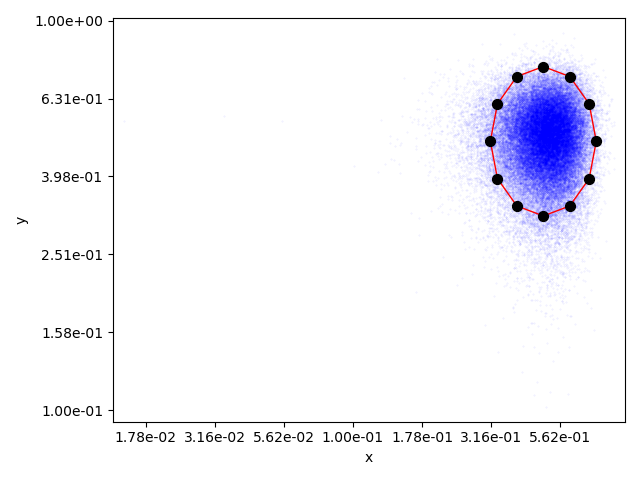

In [4]:
%matplotlib widget
# Example usage:
if __name__ == "__main__":
    np.random.seed(0)
    # Generate sample data using normal distribution
    data = {
        'x': np.random.normal(0.5, 0.1, 60000),
        'y': np.random.normal(0.5, 0.1, 60000)
    }
    df = pd.DataFrame(data)

    # Create an instance of InteractivePolygonGating with 5 vertices and logarithmic scale enabled.
    gate1 = InteractivePolygonGating(df, 'x', 'y', num_edges=12, log=True)
    # As you drag the polygon the histograms and scatter plot will update.



In [5]:
import shutil
data_path = '/Volumes/MC T9 Mac/data_temp/FACS/Exp_20251028_1'
data_source_path = '/Volumes/khammash/MC/cytoflex/Exp_20251028_1'


In [ ]:
# Copy data folder from data_source_path to data_path, if data_path directory doesn't exist, create it
shutil.copytree(data_source_path, data_path, dirs_exist_ok=True)

          FSC-H         FSC-A         SSC-H       SSC-A        FL5-H  \
0  3.939521e+06  1.000214e+07  5.652597e+06  15823600.0  389135.8125   
1  3.748755e+06  1.415618e+07  5.516404e+06  14712108.0  367891.3125   
2  3.648734e+06  8.732001e+06  5.595407e+06  11056128.0  471146.1875   
3  4.008960e+06  1.187148e+07  5.647032e+06  14032998.0  298996.5000   
4  8.412923e+05  6.611109e+05  2.781167e+05    248700.0   17020.0000   

           FL5-A      FL11-H      FL11-A         FL8-H         FL8-A  \
0  654687.375000  290.899994  347.799988  11742.900391  22778.500000   
1  882311.875000  351.100006  284.399994  14845.500000  30705.300781   
2  810443.875000  331.299988  337.100006  23396.099609  46579.601562   
3  566130.125000  326.399994  240.699997   1850.900024   3459.100098   
4   15843.900391   47.000000 -286.799988    171.500000      6.200000   

     FSC-Width   Time  
0  2599.856689    0.0  
1  3866.866455    3.0  
2  2450.598877   23.0  
3  3032.312988   79.0  
4   804.691345

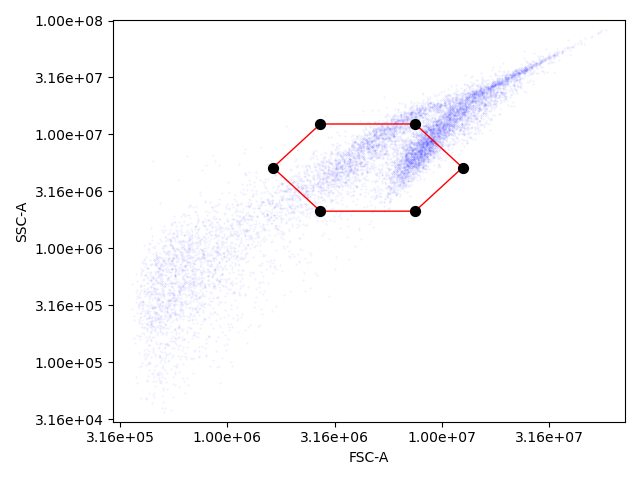

In [6]:

import FlowCal
import pandas as pd


# Read the example .facs file
test_file_path = data_path + '/01-Well-A1.fcs'
data = FlowCal.io.FCSData(test_file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=data.channels)
print(df.head())

# Filter the DataFrame

filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]

# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate1 = InteractivePolygonGating(filtered_df, 'FSC-A', 'SSC-A', num_edges=6, log=True)


In [18]:
data.__dict__

{'_infile': '/Volumes/MC T9 Mac/data_temp/FACS/Exp_20251028_1/01-Well-A1.fcs',
 '_text': {'$BEGINSTEXT': '0',
  '$ENDSTEXT': '0',
  '$BEGINDATA': '0000000000006688',
  '$ENDDATA': '0000000000486687',
  '$BEGINANALYSIS': '0',
  '$ENDANALYSIS': '0',
  '$TOT': '0000000000010000',
  'FILVER': '1',
  '$FIL': '01-Well-A1.fcs',
  '$SYS': 'Microsoft Windows NT 6.2.9200.0',
  '$MODE': 'L',
  '$BYTEORD': '1,2,3,4',
  '$DATATYPE': 'F',
  '$NEXTDATA': '0',
  'CYTEXPERTFIL': 'True',
  'TBID': '555b17d8-8eaa-4f18-ba98-1ec67514b211',
  'TBNM': '01-Well-A1',
  '$PAR': '12',
  '$BTIM': '18:47:10',
  '$ETIM': '18:47:31',
  '$DATE': '28-Oct-2025',
  '$CYT': 'CytoFLEX S',
  'RCTOT': '10000',
  'USRCTOT': 'True',
  'CGNM': 'All Events ',
  'RCTIM': '34',
  'USRCTIM': 'True',
  '$SPILLOVER': '6,FL5-H,FL11-H,FL8-H,FL5-A,FL11-A,FL8-A,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1',
  'RCVOL': '10',
  'USRCVOL': 'False',
  '$TIMESTEP': '0.00002',
  '$P1N': 'FSC-H',
  '$P1S': 'FSC-H',
 

In [19]:
data._channel_labels

('FSC-H',
 'FSC-A',
 'SSC-H',
 'SSC-A',
 'FITC-H',
 'FITC-A',
 'APC-H',
 'APC-A',
 'mCherry-H',
 'mCherry-A',
 'FSC-Width',
 'Time')

| 通道          | 对应荧光分子                            |
| :---------- | :-------------------------------- |
| **FITC**    | GFP, mGreenLantern                |
| **mCherry** | Cy3, mCherry, **mScarlet, mRuby** |
| **APC**     | APC, Cy5（远红）                      |

while need double check, generated from gpt

In [20]:
data.channels

('FSC-H',
 'FSC-A',
 'SSC-H',
 'SSC-A',
 'FL5-H',
 'FL5-A',
 'FL11-H',
 'FL11-A',
 'FL8-H',
 'FL8-A',
 'FSC-Width',
 'Time')

In [21]:
df2 = gate1.selected_data
print(df2.head())

        FSC-H      FSC-A      SSC-H       SSC-A         FL5-H         FL5-A  \
2   3648734.5  8732001.0  5595407.0  11056128.0  471146.18750  810443.87500   
5   3511512.0  7688125.5  5296131.5   9102662.0  328580.59375  506544.00000   
9   3567269.0  8407072.0  4631285.5   8234752.0  460609.81250  772972.18750   
10  3732216.0  9151397.0  4464054.5   8248593.5  302856.90625  506423.31250   
11  3215761.5  6435723.5  3827617.0   6776342.5  295871.50000  485501.90625   

        FL11-H      FL11-A         FL8-H         FL8-A    FSC-Width    Time  
2   331.299988  337.100006  23396.099609  46579.601562  2450.598877    23.0  
5   325.899994  168.600006   5029.600098   9008.200195  2241.956787   353.0  
9   310.899994  156.600006  13371.599609  26889.000000  2413.289795   923.0  
10  265.000000  -33.500000  12570.799805  26691.099609  2510.848633   934.0  
11  243.300003  151.300003   4506.500000   8255.500000  2049.338379  1003.0  


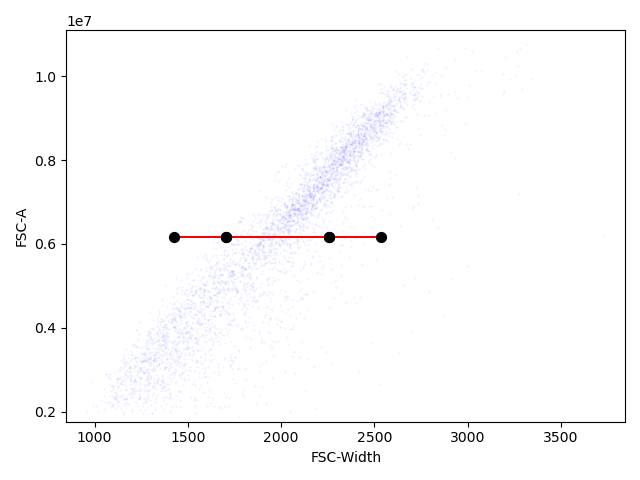

In [22]:
# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate2 = InteractivePolygonGating(df2, 'FSC-Width', 'FSC-A', num_edges=6, log=False)


In [23]:
df3 = gate2.selected_data
print(df3.head())

         FSC-H      FSC-A       SSC-H       SSC-A          FL5-H  \
5   3511512.00  7688125.5  5296131.50   9102662.0  328580.593750   
11  3215761.50  6435723.5  3827617.00   6776342.5  295871.500000   
19  2808868.25  5592918.5  5632900.50  11686104.0    2636.000000   
24  3388909.00  6636475.5  2443429.75   3883441.0  102377.796875   
25  3582040.00  7311937.0  2966590.25   4498575.0  184704.906250   

            FL5-A      FL11-H      FL11-A        FL8-H        FL8-A  \
5   506544.000000  325.899994  168.600006  5029.600098  9008.200195   
11  485501.906250  243.300003  151.300003  4506.500000  8255.500000   
19    4228.899902  575.000000  989.200012   787.500000  1284.199951   
24  151566.203125  182.899994  -70.900002   715.599976   659.000000   
25  280684.312500  193.000000   -4.000000  1538.800049  2782.600098   

      FSC-Width    Time  
5   2241.956787   353.0  
11  2049.338379  1003.0  
19  2038.955322  1457.0  
24  2005.294556  1777.0  
25  2090.267822  1924.0  


Number of selected items: 1224


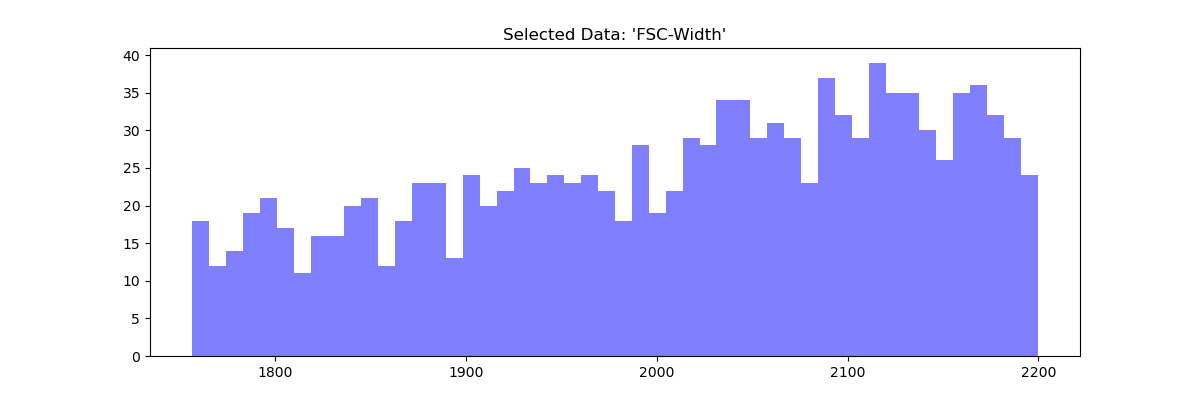

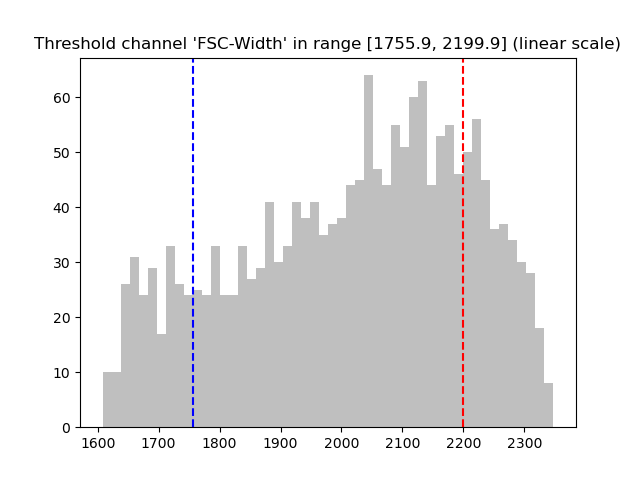

In [24]:
gate3 = InteractiveHistogramThreshold(
    data=df3,
    threshold_channel='FSC-Width',
    plot_channels=['FSC-Width']
)

In [25]:
# Get Valid range of singlet
df4 = gate3.selected_data
print(df4.head())
df4

         FSC-H      FSC-A       SSC-H       SSC-A          FL5-H  \
11  3215761.50  6435723.5  3827617.00   6776342.5  295871.500000   
19  2808868.25  5592918.5  5632900.50  11686104.0    2636.000000   
24  3388909.00  6636475.5  2443429.75   3883441.0  102377.796875   
25  3582040.00  7311937.0  2966590.25   4498575.0  184704.906250   
28  3257060.75  6163816.0  2027991.75   2986152.5  101116.703125   

            FL5-A      FL11-H      FL11-A        FL8-H        FL8-A  \
11  485501.906250  243.300003  151.300003  4506.500000  8255.500000   
19    4228.899902  575.000000  989.200012   787.500000  1284.199951   
24  151566.203125  182.899994  -70.900002   715.599976   659.000000   
25  280684.312500  193.000000   -4.000000  1538.800049  2782.600098   
28  137414.906250  267.200012 -143.800003   717.500000   749.099976   

      FSC-Width    Time  
11  2049.338379  1003.0  
19  2038.955322  1457.0  
24  2005.294556  1777.0  
25  2090.267822  1924.0  
28  1937.868896  2519.0  


,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
11,3215761.50,6435723.5,3827617.00,6776342.5,295871.500000,485501.906250,243.300003,151.300003,4506.500000,8255.500000,2049.338379,1003.0
19,2808868.25,5592918.5,5632900.50,11686104.0,2636.000000,4228.899902,575.000000,989.200012,787.500000,1284.199951,2038.955322,1457.0
24,3388909.00,6636475.5,2443429.75,3883441.0,102377.796875,151566.203125,182.899994,-70.900002,715.599976,659.000000,2005.294556,1777.0
25,3582040.00,7311937.0,2966590.25,4498575.0,184704.906250,280684.312500,193.000000,-4.000000,1538.800049,2782.600098,2090.267822,1924.0
28,3257060.75,6163816.0,2027991.75,2986152.5,101116.703125,137414.906250,267.200012,-143.800003,717.500000,749.099976,1937.868896,2519.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9936,3140505.50,5331608.5,5640098.00,9335336.0,8657.200195,10435.799805,2404.000000,4141.200195,4259.700195,7414.299805,1738.436646,1037902.0
9942,2964076.50,5589961.0,3196922.75,4415170.0,146017.796875,192044.406250,224.500000,4.200000,3395.300049,5686.500000,1931.167725,1039107.0
9960,3267721.50,6378806.0,5653098.00,11503856.0,14609.200195,18985.300781,3692.000000,6654.700195,9259.700195,17195.300781,1998.915894,1042646.0
9970,2598891.75,5249102.5,5568171.50,10850649.0,5832.799805,11637.700195,889.900024,1424.500000,988.500000,1531.400024,2068.223145,1044680.0


Number of selected items: 1179


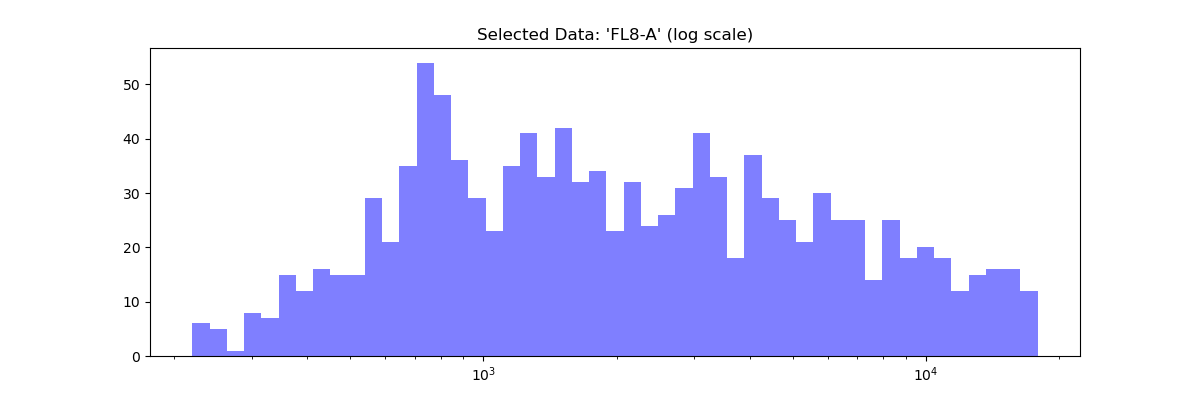

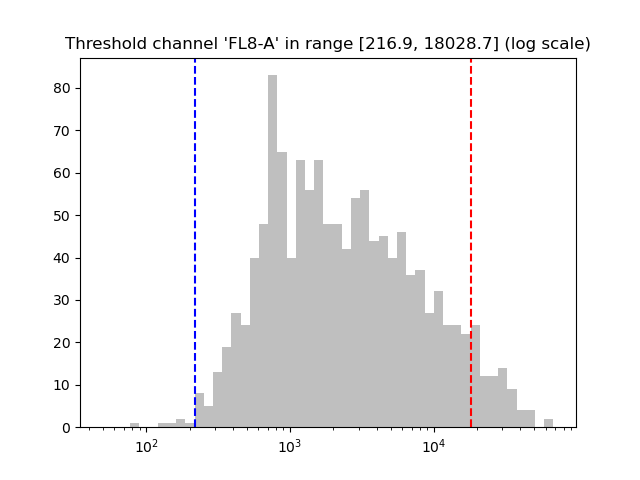

In [26]:
gate4 = InteractiveHistogramThreshold(
    data=df4,
    threshold_channel='FL8-A',
    plot_channels=['FL8-A'],
    log_scale = True
)

In [27]:
# import os
# import pandas as pd
# import FlowCal
# from glob import glob
# import numpy as np
# from tqdm import tqdm

# def auto_process(df, gating_strategy):
#     """
#     Apply a series of gating strategies to the dataframe
    
#     Parameters:
#     df (pd.DataFrame): Input dataframe
#     gating_strategy (list): List of gating strategies to apply
    
#     Returns:
#     pd.DataFrame: Dataframe after processing with all gating strategies
#     """
#     # Initial filtering - remove non-positive values
#     filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]
#     results = filtered_df.copy()
    
#     # Apply sequence of gating strategies
#     for gate in gating_strategy:
#         results = gate.apply_gate(results)
    
#     return results

# def process_all_fcs_files(folder_path, gating_strategy, file_pattern='*.fcs'):
#     """
#     Process all .fcs files in a folder matching the pattern
    
#     Parameters:
#     folder_path (str): Path to the folder containing .fcs files
#     gating_strategy (list): List of gating strategies to apply
#     file_pattern (str): File matching pattern, default is '*.fcs'
    
#     Returns:
#     tuple: (Merged DataFrame, dictionary of data for each file)
#     """
#     # Get all matching file paths
#     file_paths = glob(os.path.join(folder_path, file_pattern))
    
#     if not file_paths:
#         raise ValueError(f"No files matching '{file_pattern}' found in '{folder_path}'")
    
#     print(f"Found {len(file_paths)} files to process")
    
#     # Store processed DataFrames for each file
#     processed_dfs = {}
#     all_dfs = []
    
#     # Process each file
#     for file_path in tqdm(file_paths, desc="Processing files"):
#         file_name = os.path.basename(file_path)
        
#         try:
#             # Read .fcs file
#             data = FlowCal.io.FCSData(file_path)
            
#             # Extract metadata (optional)
#             metadata = {
#                 'file_name': file_name,
#                 'event_count': data.shape[0],
#                 # Can add more metadata
#             }
            
#             # Convert to DataFrame
#             df = pd.DataFrame(data, columns=data.channels)
            
#             # Add file identifier column
#             df['file_name'] = file_name
            
#             # Apply gating strategy
#             processed_df = auto_process(df, gating_strategy)
            
#             # Store results
#             processed_dfs[file_name] = {
#                 'data': processed_df,
#                 'metadata': metadata,
#                 'original_event_count': df.shape[0],
#                 'processed_event_count': processed_df.shape[0]
#             }
            
#             # Add to merge list
#             all_dfs.append(processed_df)
            
#             print(f"Processing complete: {file_name} - Original events: {df.shape[0]}, Processed events: {processed_df.shape[0]}")
            
#         except Exception as e:
#             print(f"Error processing file '{file_name}': {str(e)}")
    
#     # Merge all processed DataFrames
#     if all_dfs:
#         combined_df = pd.concat(all_dfs, ignore_index=True)
#         print(f"All files processed. Merged DataFrame contains {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")
#     else:
#         combined_df = pd.DataFrame()
#         print("No files were successfully processed.")
    
#     return combined_df, processed_dfs

# def save_results(combined_df, processed_dfs, output_folder, base_filename="processed_data"):
#     """
#     Save processing results
    
#     Parameters:
#     combined_df (pd.DataFrame): Merged dataframe
#     processed_dfs (dict): Dictionary of processing results for each file
#     output_folder (str): Output folder path
#     base_filename (str): Base filename
#     """
#     # Ensure output folder exists
#     os.makedirs(output_folder, exist_ok=True)
    
#     # Save merged DataFrame
#     if not combined_df.empty:
#         combined_path = os.path.join(output_folder, f"{base_filename}_combined.csv")
#         combined_df.to_csv(combined_path, index=False)
#         print(f"Merged data saved to: {combined_path}")
    
#     # Save processing statistics
#     stats = []
#     for file_name, info in processed_dfs.items():
#         stats.append({
#             'file_name': file_name,
#             'original_events': info['original_event_count'],
#             'processed_events': info['processed_event_count'],
#             'retention_rate': info['processed_event_count'] / info['original_event_count'] if info['original_event_count'] > 0 else 0
#         })
    
#     if stats:
#         stats_df = pd.DataFrame(stats)
#         stats_path = os.path.join(output_folder, f"{base_filename}_statistics.csv")
#         stats_df.to_csv(stats_path, index=False)
#         print(f"Processing statistics saved to: {stats_path}")
    
#     # Optional: Save each processed file separately
#     for file_name, info in processed_dfs.items():
#         file_base = os.path.splitext(file_name)[0]
#         individual_path = os.path.join(output_folder, f"{file_base}_processed.csv")
#         info['data'].to_csv(individual_path, index=False)


In [28]:

# Example usage
if __name__ == "__main__":
    # Gating strategy defined (assuming gating_strategy = [gate1, gate2, gate3] is already defined)
    gating_strategy = [gate1,gate2,gate3]
    folder_path = r'/Volumes/MC T9 Mac/data_temp/FACS/Exp_20251028_1'
    output_folder = r'/Volumes/MC T9 Mac/analysis and plot/GM05/FACS/Exp_20251028_1/'
    
    # Process all .fcs files
    combined_df, processed_dfs = process_all_fcs_files(folder_path, gating_strategy)
    
    # Save results
    save_results(combined_df, processed_dfs, output_folder)
    
    # Display some basic statistics for the merged data
    if not combined_df.empty:
        print("\nBasic statistics:")
        print(f"Total event count: {combined_df.shape[0]}")
        print(f"Average events per file: {combined_df.shape[0] / len(processed_dfs):.2f}")
        
        # Group statistics by filename
        file_counts = combined_df.groupby('file_name').size()
        print("\nEvent count per file:")
        print(file_counts)

Found 96 files to process


Processing files:   8%|▊         | 8/96 [00:00<00:01, 70.40it/s]

Applied gate to new data. Selected 1778 out of 2246 items.
Processing complete: 01-Well-E11.fcs - Original events: 10000, Processed events: 1778
Applied gate to new data. Selected 1670 out of 2186 items.
Processing complete: 01-Well-E12.fcs - Original events: 10000, Processed events: 1670
Applied gate to new data. Selected 544 out of 618 items.
Processing complete: 01-Well-C10.fcs - Original events: 4388, Processed events: 544
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 01-Well-G8.fcs - Original events: 163, Processed events: 0
Applied gate to new data. Selected 15 out of 18 items.
Processing complete: 01-Well-F4.fcs - Original events: 259, Processed events: 15
Applied gate to new data. Selected 37 out of 50 items.
Processing complete: 01-Well-B3.fcs - Original events: 2447, Processed events: 37
Applied gate to new data. Selected 1462 out of 1946 items.
Processing complete: 01-Well-H6.fcs - Original events: 10000, Processed events: 1462
Applied gate to new

Processing files:  17%|█▋        | 16/96 [00:00<00:01, 71.51it/s]

Applied gate to new data. Selected 1357 out of 1823 items.
Processing complete: 01-Well-G2.fcs - Original events: 10000, Processed events: 1357
Applied gate to new data. Selected 1522 out of 1795 items.
Processing complete: 01-Well-C1.fcs - Original events: 10000, Processed events: 1522
Applied gate to new data. Selected 5 out of 6 items.
Processing complete: 01-Well-H9.fcs - Original events: 158, Processed events: 5


Processing files:  25%|██▌       | 24/96 [00:00<00:01, 64.88it/s]

Applied gate to new data. Selected 1657 out of 2169 items.
Processing complete: 01-Well-G11.fcs - Original events: 10000, Processed events: 1657
Applied gate to new data. Selected 1268 out of 1796 items.
Processing complete: 01-Well-A1.fcs - Original events: 10000, Processed events: 1268
Applied gate to new data. Selected 739 out of 1052 items.
Processing complete: 01-Well-A7.fcs - Original events: 9861, Processed events: 739
Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 01-Well-A3.fcs - Original events: 172, Processed events: 1
Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 01-Well-G7.fcs - Original events: 141, Processed events: 1
Applied gate to new data. Selected 1536 out of 1889 items.
Processing complete: 01-Well-F6.fcs - Original events: 10000, Processed events: 1536
Applied gate to new data. Selected 1942 out of 2411 items.
Processing complete: 01-Well-B9.fcs - Original events: 10000, Processed events: 1942
Applied gate to 

Processing files:  53%|█████▎    | 51/96 [00:00<00:00, 91.36it/s]

Applied gate to new data. Selected 112 out of 150 items.
Processing complete: 01-Well-F10.fcs - Original events: 5342, Processed events: 112
Applied gate to new data. Selected 64 out of 70 items.
Processing complete: 01-Well-B10.fcs - Original events: 393, Processed events: 64
Applied gate to new data. Selected 888 out of 1259 items.
Processing complete: 01-Well-A9.fcs - Original events: 10000, Processed events: 888
Applied gate to new data. Selected 17 out of 17 items.
Processing complete: 01-Well-E3.fcs - Original events: 346, Processed events: 17
Applied gate to new data. Selected 2 out of 3 items.
Processing complete: 01-Well-C9.fcs - Original events: 153, Processed events: 2
Applied gate to new data. Selected 1666 out of 2010 items.
Processing complete: 01-Well-B11.fcs - Original events: 10000, Processed events: 1666
Applied gate to new data. Selected 5 out of 7 items.
Processing complete: 01-Well-E9.fcs - Original events: 169, Processed events: 5
Applied gate to new data. Selecte

Processing files:  64%|██████▎   | 61/96 [00:00<00:00, 88.95it/s]

Applied gate to new data. Selected 1750 out of 2071 items.
Processing complete: 01-Well-B8.fcs - Original events: 10000, Processed events: 1750
Applied gate to new data. Selected 4 out of 5 items.
Processing complete: 01-Well-A6.fcs - Original events: 269, Processed events: 4
Applied gate to new data. Selected 4 out of 7 items.
Processing complete: 01-Well-A11.fcs - Original events: 174, Processed events: 4
Applied gate to new data. Selected 1993 out of 2450 items.
Processing complete: 01-Well-A10.fcs - Original events: 10000, Processed events: 1993
Applied gate to new data. Selected 2 out of 6 items.
Processing complete: 01-Well-A12.fcs - Original events: 129, Processed events: 2
Applied gate to new data. Selected 1944 out of 2452 items.
Processing complete: 01-Well-D5.fcs - Original events: 10000, Processed events: 1944
Applied gate to new data. Selected 10 out of 15 items.
Processing complete: 01-Well-B6.fcs - Original events: 245, Processed events: 10
Applied gate to new data. Sele

Processing files:  82%|████████▏ | 79/96 [00:00<00:00, 75.61it/s]

Applied gate to new data. Selected 1083 out of 1600 items.
Processing complete: 01-Well-A8.fcs - Original events: 10000, Processed events: 1083
Applied gate to new data. Selected 10 out of 13 items.
Processing complete: 01-Well-C6.fcs - Original events: 198, Processed events: 10
Applied gate to new data. Selected 5 out of 5 items.
Processing complete: 01-Well-H4.fcs - Original events: 148, Processed events: 5
Applied gate to new data. Selected 4 out of 6 items.
Processing complete: 01-Well-B7.fcs - Original events: 152, Processed events: 4
Applied gate to new data. Selected 618 out of 871 items.
Processing complete: 01-Well-B1.fcs - Original events: 7956, Processed events: 618
Applied gate to new data. Selected 1521 out of 2028 items.
Processing complete: 01-Well-F8.fcs - Original events: 10000, Processed events: 1521
Applied gate to new data. Selected 42 out of 56 items.
Processing complete: 01-Well-E5.fcs - Original events: 3069, Processed events: 42
Applied gate to new data. Selecte

Processing files: 100%|██████████| 96/96 [00:01<00:00, 76.78it/s]

Applied gate to new data. Selected 1121 out of 1472 items.
Processing complete: 01-Well-H2.fcs - Original events: 10000, Processed events: 1121
Applied gate to new data. Selected 6 out of 8 items.
Processing complete: 01-Well-F9.fcs - Original events: 172, Processed events: 6
Applied gate to new data. Selected 2306 out of 2809 items.
Processing complete: 01-Well-F2.fcs - Original events: 10000, Processed events: 2306
Applied gate to new data. Selected 1360 out of 1895 items.
Processing complete: 01-Well-E1.fcs - Original events: 10000, Processed events: 1360
Applied gate to new data. Selected 2523 out of 2882 items.
Processing complete: 01-Well-C12.fcs - Original events: 10000, Processed events: 2523
Applied gate to new data. Selected 1 out of 2 items.
Processing complete: 01-Well-E10.fcs - Original events: 122, Processed events: 1
Applied gate to new data. Selected 1 out of 3 items.
Processing complete: 01-Well-E6.fcs - Original events: 190, Processed events: 1
Applied gate to new dat

Merged data saved to: /Volumes/MC T9 Mac/analysis and plot/GM05/FACS/Exp_20251028_1/processed_data_combined.csv
Processing statistics saved to: /Volumes/MC T9 Mac/analysis and plot/GM05/FACS/Exp_20251028_1/processed_data_statistics.csv

Basic statistics:
Total event count: 75526
Average events per file: 786.73

Event count per file:
file_name
01-Well-A1.fcs     1268
01-Well-A10.fcs    1993
01-Well-A11.fcs       4
01-Well-A12.fcs       2
01-Well-A2.fcs        9
                   ... 
01-Well-H5.fcs        5
01-Well-H6.fcs     1462
01-Well-H7.fcs     2109
01-Well-H8.fcs     2440
01-Well-H9.fcs        5
Length: 92, dtype: int64


In [29]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import os
# from matplotlib.ticker import ScalarFormatter

# def analyze_fl8_by_file(csv_path, output_folder=None):
#     """
#     Read processed CSV data, calculate FL8-A mean values grouped by file name and generate bar charts
    
#     Parameters:
#     csv_path (str): Path to the CSV file containing merged processed data
#     output_folder (str, optional): Output folder for charts, if not specified, charts will only be displayed
    
#     Returns:
#     pd.DataFrame: DataFrame containing FL8-A mean, standard deviation, and sample size for each file
#     """
#     # Set simple style
#     plt.style.use('seaborn-v0_8-pastel')
    
#     # Ensure output folder exists
#     if output_folder:
#         os.makedirs(output_folder, exist_ok=True)
    
#     # Read CSV file
#     print(f"Reading data file: {csv_path}")
#     df = pd.read_csv(csv_path)
    
#     # Check if necessary columns exist
#     if 'file_name' not in df.columns:
#         raise ValueError("Data is missing 'file_name' column")
#     if 'FL8-A' not in df.columns:
#         raise ValueError("Data is missing 'FL8-A' column")
    
#     print(f"Successfully read data with {df.shape[0]} rows and {df.shape[1]} columns")
    
#     # Group by file name and calculate FL8-A mean
#     fl8_stats = df.groupby('file_name')['FL8-A'].agg(['mean', 'std', 'count']).reset_index()
#     fl8_stats = fl8_stats.rename(columns={
#         'mean': 'FL8-A Mean', 
#         'std': 'FL8-A Std', 
#         'count': 'Sample Size'
#     })
    
#     # Calculate 95% confidence interval
#     fl8_stats['FL8-A CI'] = 1.96 * fl8_stats['FL8-A Std'] / np.sqrt(fl8_stats['Sample Size'])
    
#     # Extract key information from file names (assuming format: "Well-A1.fcs")
#     fl8_stats['Well'] = fl8_stats['file_name'].str.extract(r'([A-Z]\d+)')
    
#     print("FL8-A group statistics results:")
#     print(fl8_stats)
    
#     # Choose an appealing color
#     bar_color = '#4682B4'  # Steel Blue
    
#     # Create bar chart
#     plt.figure(figsize=(12, 6))
    
#     # Use seaborn to generate bar chart with single color
#     ax = sns.barplot(
#         x='file_name', 
#         y='FL8-A Mean', 
#         data=fl8_stats,
#         color=bar_color,
#         capsize=0.1,
#         alpha=0.8
#     )
    
#     # Add error bars (95% confidence interval)
#     for i, row in fl8_stats.iterrows():
#         ax.errorbar(
#             i, row['FL8-A Mean'], 
#             yerr=row['FL8-A CI'], 
#             fmt='none', 
#             c='black', 
#             capsize=5
#         )
    
#     # Adjust x-axis labels if there are many files
#     if len(fl8_stats) > 10:
#         plt.xticks(rotation=45, ha='right')
    
#     # Set chart title and labels
#     plt.title('Average FL8-A Values by File', fontsize=14)
#     plt.xlabel('File Name', fontsize=12)
#     plt.ylabel('FL8-A Mean Value', fontsize=12)
    
#     # Add data labels
#     for i, v in enumerate(fl8_stats['FL8-A Mean']):
#         ax.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=9)
    
#     # Optimize layout
#     plt.tight_layout()
    
#     # Save chart (if output folder is specified)
#     if output_folder:
#         output_path = os.path.join(output_folder, 'FL8-A_by_file.png')
#         plt.savefig(output_path, dpi=300)
#         print(f"Bar chart saved to: {output_path}")
    
#     # Display chart
#     plt.show()
    
#     # Create logarithmic scale version (if data range is large)
#     if fl8_stats['FL8-A Mean'].max() / fl8_stats['FL8-A Mean'].min() > 10:
#         plt.figure(figsize=(12, 6))
        
#         # Use seaborn to generate bar chart (log scale)
#         ax = sns.barplot(
#             x='file_name', 
#             y='FL8-A Mean', 
#             data=fl8_stats,
#             color=bar_color,
#             capsize=0.1,
#             alpha=0.8
#         )
        
#         # Set logarithmic scale
#         plt.yscale('log')
        
#         # Format y-axis labels as normal numbers (not scientific notation)
#         ax.yaxis.set_major_formatter(ScalarFormatter())
        
#         # Adjust x-axis labels if there are many files
#         if len(fl8_stats) > 10:
#             plt.xticks(rotation=45, ha='right')
        
#         # Set chart title and labels
#         plt.title('Average FL8-A Values by File (Log Scale)', fontsize=14)
#         plt.xlabel('File Name', fontsize=12)
#         plt.ylabel('FL8-A Mean Value (Log Scale)', fontsize=12)
        
#         # Optimize layout
#         plt.tight_layout()
        
#         # Save chart (if output folder is specified)
#         if output_folder:
#             output_path = os.path.join(output_folder, 'FL8-A_by_file_log_scale.png')
#             plt.savefig(output_path, dpi=300)
#             print(f"Log scale bar chart saved to: {output_path}")
        
#         # Display chart
#         plt.show()
    
#     # Create version sorted by sample size
#     plt.figure(figsize=(12, 6))
    
#     # Sort by sample size
#     fl8_stats_sorted = fl8_stats.sort_values('Sample Size', ascending=False)
    
#     # Generate bar chart
#     ax = sns.barplot(
#         x='file_name', 
#         y='FL8-A Mean', 
#         data=fl8_stats_sorted,
#         order=fl8_stats_sorted['file_name'],
#         color=bar_color,
#         capsize=0.1,
#         alpha=0.8
#     )
    
#     # Add error bars
#     for i, (_, row) in enumerate(fl8_stats_sorted.iterrows()):
#         ax.errorbar(
#             i, row['FL8-A Mean'], 
#             yerr=row['FL8-A CI'], 
#             fmt='none', 
#             c='black', 
#             capsize=5
#         )
    
#     # Adjust x-axis labels if there are many files
#     if len(fl8_stats) > 10:
#         plt.xticks(rotation=45, ha='right')
    
#     # Set chart title and labels
#     plt.title('Average FL8-A Values by File (Sorted by Sample Size)', fontsize=14)
#     plt.xlabel('File Name', fontsize=12)
#     plt.ylabel('FL8-A Mean Value', fontsize=12)
    
#     # Optimize layout
#     plt.tight_layout()
    
#     # Save chart (if output folder is specified)
#     if output_folder:
#         output_path = os.path.join(output_folder, 'FL8-A_by_file_sorted.png')
#         plt.savefig(output_path, dpi=300)
#         print(f"Bar chart sorted by sample size saved to: {output_path}")
    
#     # Display chart
#     plt.show()
    
#     # Output CSV statistics
#     if output_folder:
#         stats_path = os.path.join(output_folder, 'FL8-A_statistics.csv')
#         fl8_stats.to_csv(stats_path, index=False)
#         print(f"FL8-A statistics saved to: {stats_path}")
    
#     return fl8_stats


Reading data file: /Volumes/MC T9 Mac/analysis and plot/GM05/FACS/Exp_20251028_1/processed_data_combined.csv
Successfully read data with 75526 rows and 13 columns
FL8-A group statistics results:
          file_name   FL8-A Mean     FL8-A Std  Sample Size     FL8-A CI Well
0    01-Well-A1.fcs  5066.436672   7494.288381         1268   412.502747   A1
1   01-Well-A10.fcs  2775.878073   4653.406913         1993   204.302393  A10
2   01-Well-A11.fcs  1283.925000   1367.466924            4  1340.117586  A11
3   01-Well-A12.fcs  1556.800000    710.783736            2   985.096000  A12
4    01-Well-A2.fcs  7633.422222   3481.925493            9  2274.857989   A2
..              ...          ...           ...          ...          ...  ...
87   01-Well-H5.fcs  2598.420000   2639.571785            5  2313.686681   H5
88   01-Well-H6.fcs  3454.350068   3675.128460         1462   188.388726   H6
89   01-Well-H7.fcs  3180.209151   4482.914205         2109   191.327858   H7
90   01-Well-H8.fcs  6749

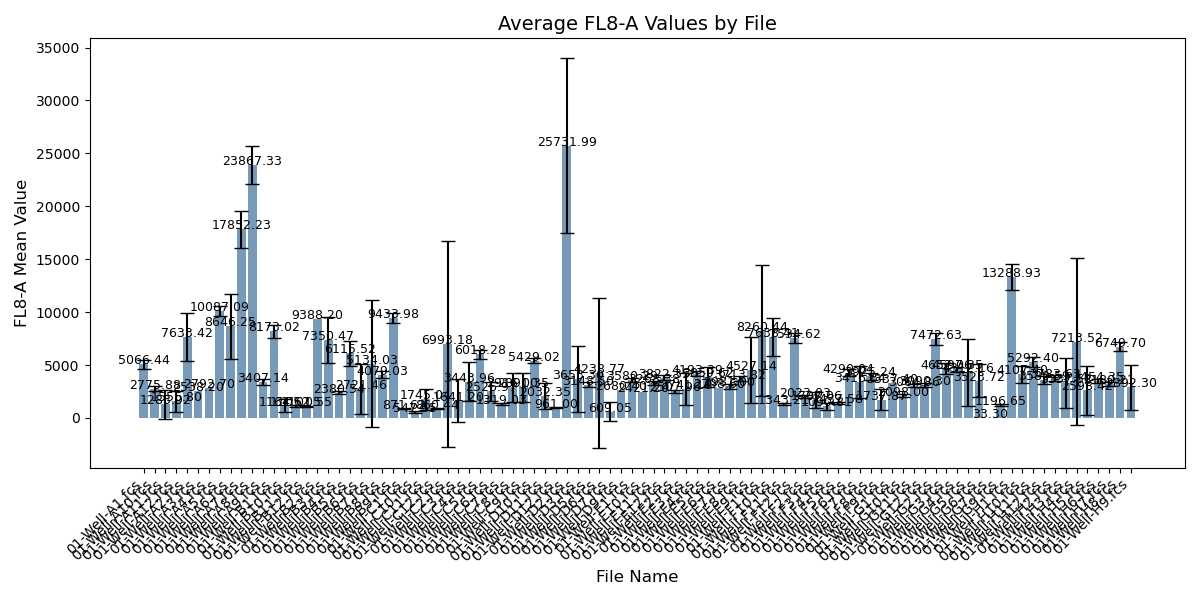

Log scale bar chart saved to: /Volumes/MC T9 Mac/analysis and plot/GM05/FACS/Exp_20251028_1/analysis_results/FL8-A_by_file_log_scale.png


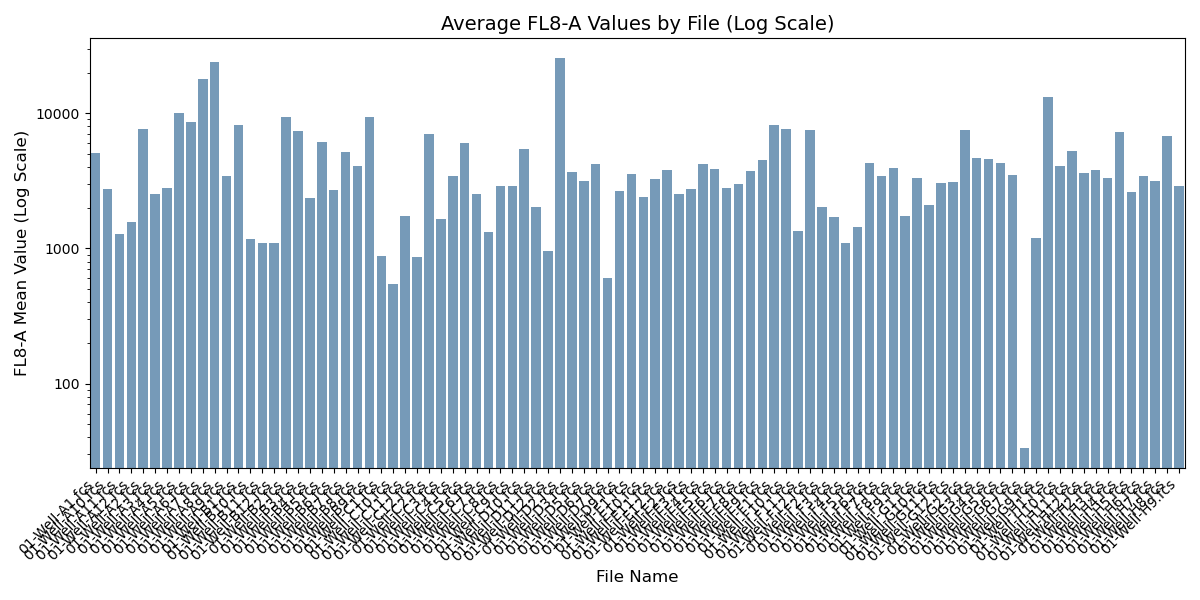

Bar chart sorted by sample size saved to: /Volumes/MC T9 Mac/analysis and plot/GM05/FACS/Exp_20251028_1/analysis_results/FL8-A_by_file_sorted.png


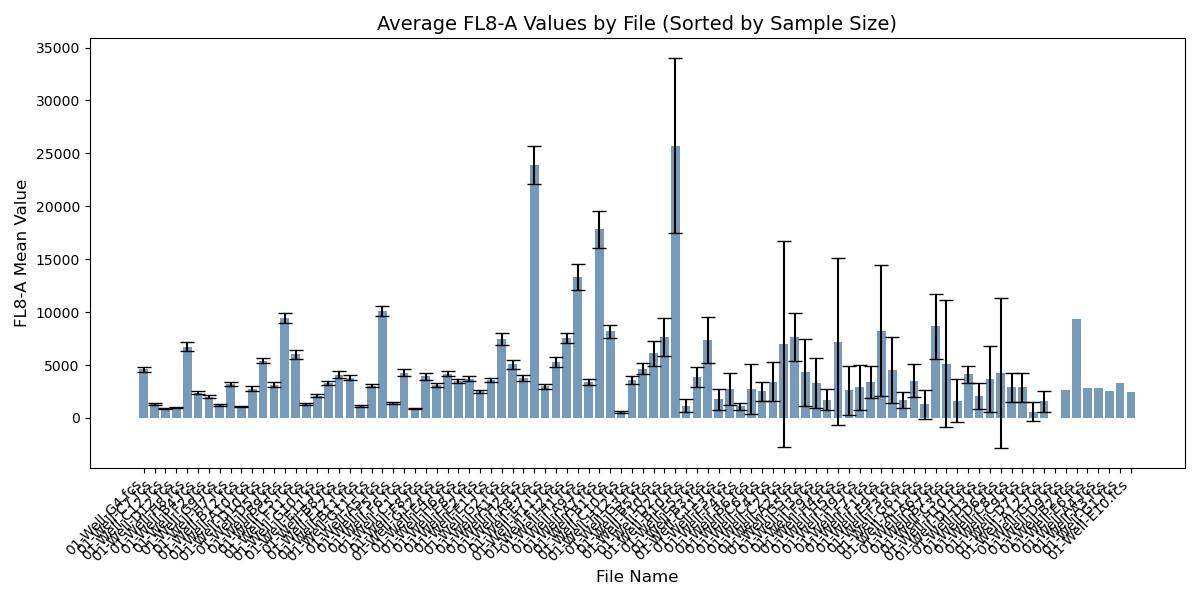

FL8-A statistics saved to: /Volumes/MC T9 Mac/analysis and plot/GM05/FACS/Exp_20251028_1/analysis_results/FL8-A_statistics.csv


In [30]:

# Example usage
if __name__ == "__main__":
    # Set file paths
    csv_path = r'/Volumes/MC T9 Mac/analysis and plot/GM05/FACS/Exp_20251028_1/processed_data_combined.csv'
    output_folder = r'/Volumes/MC T9 Mac/analysis and plot/GM05/FACS/Exp_20251028_1/analysis_results/'
    
    # Analyze data and generate charts
    fl8_stats = analyze_fl8_by_file(csv_path, output_folder)

In [ ]:
# A5>A6>A2>A1

# Think about seeding these 4 samples;

